# import libraries 

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Read data

In [2]:
data = pd.read_csv("Dubizzle_properties.csv")

In [3]:
dbzl = data.copy()

# EDA

In [4]:
dbzl.head()

,link,title,price,down_payment,location,creation_date,property_type,ownership,area,bedrooms,bathrooms,furnished,level,payment_option,completion_status,amenities,ad_id,seller_type,seller_name,seller_member_since
0,https://www.dubizzle.com.eg/en/ad/ready-to-liv...,Ready to live in - apartment for sale at Mount...,"EGP 5,328,000","EGP 4,680,000 Down Payment","Mountain View iCity Compound, 6th of October",1 day ago,Apartment,Resale,114,2,2,No,Not Available,Installment,Ready,"Balcony, Security, Pets Allowed, Electricity M...",501924822,Listed by agency,Square Feet,Member since Jan 2025
1,https://www.dubizzle.com.eg/en/ad/apartment-fo...,"Apartment for sale in Al Rehab, near services,...","EGP 10,500,000",Not Available,"Rehab City Compound, New Cairo",2 days ago,Apartment,Resale,200,3,3,No,Not Available,Cash,Ready,"Balcony, Private Garden, Security, Electricity...",501847438,Listed by agency,Escan,Member since Jan 2024
2,https://www.dubizzle.com.eg/en/ad/invest-in-ap...,Invest in apartment with size 103 sqm - Privat...,"EGP 6,437,500","EGP 917,345 Down Payment","Hurghada, Red Sea",5 hours ago,Apartment,Primary,103,2,2,No,4,Installment,Off-plan,"Balcony, Security, Pool, Electricity Meter, Wa...",501836294,Listed by agency,اميرالد للتسويق و الاستشارات و الاستثمارات الع...,Member since Oct 2023
3,https://www.dubizzle.com.eg/en/ad/under-market...,Under Market Price Apartment for Sale in Andal...,"EGP 4,100,000",Not Available,"Andalus, New Cairo",1 day ago,Apartment,Resale,185,3,2,No,Not Available,Cash,Ready,"Balcony, Security, Covered Parking",501712573,Listed by agency,New Avenue,Member since Mar 2024
4,https://www.dubizzle.com.eg/en/ad/%D8%B4%D9%82...,شقة غرفتين للبيع جنب نادي الزمالك في اكتوبر با...,"EGP 4,900,000","EGP 490,000 Down Payment","Zat, 6th of October",2 days ago,Apartment,Primary,112,2,2,No,Not Available,Installment,Ready,Not Available,501684842,Listed by agency,Abrag Three,Member since Feb 2025


In [5]:
dbzl.shape

(4966, 20)

In [6]:
dbzl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   link                 4966 non-null   object
 1   title                4966 non-null   object
 2   price                4966 non-null   object
 3   down_payment         4966 non-null   object
 4   location             4966 non-null   object
 5   creation_date        4966 non-null   object
 6   property_type        4966 non-null   object
 7   ownership            4966 non-null   object
 8   area                 4966 non-null   object
 9   bedrooms             4966 non-null   object
 10  bathrooms            4966 non-null   object
 11  furnished            4966 non-null   object
 12  level                4966 non-null   object
 13  payment_option       4966 non-null   object
 14  completion_status    4966 non-null   object
 15  amenities            4966 non-null   object
 16  ad_id 

1. Data Overview:
4966 entries with 20 columns

2. Columns:
Key columns include:price, down_payment, area, bedrooms, bathrooms, location, property_type, etc.

3. Data Type:
All columns are of type object (string), so columns like price, area, bedrooms, and bathrooms need to be converted to numerical values.

In [7]:
dbzl.describe(include='all').T

,count,unique,top,freq
link,4966,4966,https://www.dubizzle.com.eg/en/ad/ready-to-liv...,1
title,4966,4775,Not Available,19
price,4966,1440,"EGP 6,000,000",115
down_payment,4966,959,Not Available,3014
location,4966,556,"Madinaty, Cairo",322
creation_date,4966,45,2 days ago,1795
property_type,4966,8,Apartment,4422
ownership,4966,4,Primary,2538
area,4966,322,140,153
bedrooms,4966,11,3,2869


Unique Listings:

- Links: Each entry has a unique link.
- Titles: 4775 unique titles, suggesting some repeated titles (e.g., 19 listings share the same title).
- Prices: 1440 unique prices; however, the "Not Available" price appears frequently (115 occurrences).
- Down Payment: There are 959 unique down payments, with "Not Available" being the most frequent (3014 occurrences).

Geographic and Temporal Data:
- Locations: 556 unique locations, with a concentration of listings in certain areas like Madinaty, Cairo (322 occurrences).
- Creation Dates: 45 unique creation dates, with "2 days ago" being the most common.
  
Property Details:
- Property Types: 8 unique types, with "Apartment" being the most frequent.
- Ownership: 4 types of ownership, with "Primary" being the most common.
- Area: 322 unique area sizes, ranging from small to large properties.
- Bedrooms & Bathrooms: 11 unique bedroom counts and 9 unique bathroom counts.
- Furnished: 4 unique values, with most properties being marked as "Not Available" for the furnished status.

Payment and Completion:
- Payment Options: 15 unique payment options; "Cash" is the most common.
- Completion Status: 5 statuses, with "Ready" being the most frequent.

Seller Information:
- Seller Type: 4 unique types, with "Listed by agency" being the most frequent.
- Seller Member Since: 770 unique values, suggesting diverse seller membership durations, but "Member since Feb 2025" stands out with 423 occurrences.

In [8]:
dbzl.nunique()

link                   4966
title                  4775
price                  1440
down_payment            959
location                556
creation_date            45
property_type             8
ownership                 4
area                    322
bedrooms                 11
bathrooms                 9
furnished                 4
level                    15
payment_option            5
completion_status         4
amenities               954
ad_id                  4940
seller_type               4
seller_name             770
seller_member_since     124
dtype: int64

In [9]:
columns = ['property_type','ownership','bedrooms','bathrooms','furnished','level','payment_option','completion_status','seller_type','creation_date','seller_member_since','location']
for col in columns:
    print(dbzl[col].value_counts())

property_type
Apartment          4422
Duplex              251
Penthouse           149
Studio               78
Hotel Apartment      27
Not Available        19
Roof                 11
Error                 9
Name: count, dtype: int64
ownership
Primary          2538
Resale           2400
Not Available      19
Error               9
Name: count, dtype: int64
bedrooms
3                2869
2                1335
4                 406
1                 267
5                  47
Not Available      19
6                  10
Error               9
7                   2
8                   1
10+                 1
Name: count, dtype: int64
bathrooms
2                1983
3                1884
1                 800
4                 241
5                  21
Not Available      19
Error               9
6                   8
8                   1
Name: count, dtype: int64
furnished
No               3748
Not Available     894
Yes               315
Error               9
Name: count, dtype: int64
level
Not

In [10]:
dbzl[dbzl["seller_type"].isin(["Error", "Not Available"])]

,link,title,price,down_payment,location,creation_date,property_type,ownership,area,bedrooms,bathrooms,furnished,level,payment_option,completion_status,amenities,ad_id,seller_type,seller_name,seller_member_since
166,https://www.dubizzle.com.eg/en/ad/%D8%A8%D9%86...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
171,https://www.dubizzle.com.eg/en/ad/apartment-fo...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
172,https://www.dubizzle.com.eg/en/ad/apartment-fo...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
173,https://www.dubizzle.com.eg/en/ad/at-an-attrac...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
175,https://www.dubizzle.com.eg/en/ad/apartment-37...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
176,https://www.dubizzle.com.eg/en/ad/apartment-fu...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
177,https://www.dubizzle.com.eg/en/ad/%D8%B1%D9%8A...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
178,https://www.dubizzle.com.eg/en/ad/apartment-fo...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
179,https://www.dubizzle.com.eg/en/ad/%D8%B4%D9%82...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
180,https://www.dubizzle.com.eg/en/ad/horizon-grou...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [11]:
dbzl.replace(["Not Available", "Error"], pd.NA, inplace=True)

dbzl.dropna(subset=dbzl.columns[1:], how="all", inplace=True)

In [12]:
dbzl['down_payment'].value_counts(dropna=False)

down_payment
<NA>                          2995
0% Down Payment                186
EGP 6,500,000 Down Payment      21
EGP 1,300,000 Down Payment      20
EGP 1,000,000 Down Payment      18
                              ... 
EGP 1,651,650 Down Payment       1
EGP 1,480,000 Down Payment       1
EGP 508,167 Down Payment         1
EGP 5,980,000 Down Payment       1
EGP 203,054 Down Payment         1
Name: count, Length: 958, dtype: int64

# Regular Expressions

In [13]:
dbzl['price'] = pd.to_numeric(dbzl['price'].apply(lambda x: re.sub(r'EGP\s*([\d,]+)', r'\1', str(x)).replace(',', '')), errors='coerce')

dbzl['down_payment'] = pd.to_numeric(dbzl['down_payment'].apply(lambda x: re.sub(r'[^\d]', '', str(x)) if "0%" not in str(x) else '0'),errors='coerce')

dbzl['area'] = pd.to_numeric(dbzl['area'].apply(lambda x: re.sub(r'(\d+)\s*m²', r'\1', str(x))), errors='coerce')

def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    match = re.search(r'(\d+)', str(date_str))
    if not match:
        return pd.NaT
    
    num = int(match.group(1))
    date_str = str(date_str).lower()
    
    if "day" in date_str:
        return datetime.now() - timedelta(days=num)
    elif "hour" in date_str:
        return datetime.now() - timedelta(hours=num)
    elif "minute" in date_str:
        return datetime.now() - timedelta(minutes=num)
    elif "week" in date_str:
        return datetime.now() - timedelta(weeks=num)
    elif "month" in date_str:
        return datetime.now() - timedelta(days=30*num) 
    else:
        return pd.NaT

dbzl['creation_date'] = dbzl['creation_date'].apply(parse_date)
dbzl['creation_date'] = dbzl['creation_date'].dt.date

def split_location_regex(loc_str):
    if pd.isna(loc_str):
        return pd.Series([None, None])
    
    match = re.match(r'^(.*?),\s*(.*)$', loc_str)
    if match:
        return pd.Series([match.group(1).strip(), match.group(2).strip()])
    else:
        return pd.Series([loc_str.strip(), None])  # لو مفيش فاصلة خالص

dbzl[['area_name', 'city']] = dbzl['location'].apply(split_location_regex)

def extract_year(member_str):
    if pd.isna(member_str):
        return np.nan
    match = re.search(r'\b(\d{4})\b', str(member_str))
    return int(match.group(1)) if match else np.nan

dbzl['seller_member_since_year'] = dbzl['seller_member_since'].apply(extract_year)

In [14]:
dbzl.sample(3)

,link,title,price,down_payment,location,creation_date,property_type,ownership,area,bedrooms,...,payment_option,completion_status,amenities,ad_id,seller_type,seller_name,seller_member_since,area_name,city,seller_member_since_year
3254,https://www.dubizzle.com.eg/en/ad/173m2-apartm...,173m² Apartment at the Best Price with a Stunn...,3426265,513939.0,"Obour City, Cairo",2025-05-01,Apartment,Primary,173.0,3,...,Cash or Installment,Off-plan,"Private Garden, Security, Covered Parking, Pet...",501925430,Listed by agency,اميرالد للتسويق و الاستشارات و الاستثمارات الع...,Member since Mar 2025,Obour City,Cairo,2025
587,https://www.dubizzle.com.eg/en/ad/apartment-fo...,"Apartment for sale, ground floor with a garden...",7200000,720000.0,"IL Bosco, New Capital City",2025-05-01,Apartment,Primary,124.0,1,...,Cash or Installment,Ready,"Private Garden, Security, Covered Parking, Pet...",501919482,Listed by agency,Capital Agency,Member since Jun 2024,IL Bosco,New Capital City,2024
2304,https://www.dubizzle.com.eg/en/ad/%D8%B4%D9%82...,شقه للبيع كمبوند مون فالي استلام فوري بالتقسي...,14750000,NaN,"Moon Valley Compound, 5th Settlement",2025-04-30,Apartment,Primary,152.0,3,...,Cash or Installment,Ready,"Balcony, Central A/C & heating, Security, Cove...",204333733,Listed by agency,Property Hills One,Member since Apr 2019,Moon Valley Compound,5th Settlement,2019


# Data Cleaning and Processing

In [15]:
dbzl.isnull().sum()

link                           0
title                          0
price                          0
down_payment                2995
location                       0
creation_date                  0
property_type                  0
ownership                      0
area                           6
bedrooms                       0
bathrooms                      0
furnished                    875
level                       3162
payment_option                43
completion_status              0
amenities                   1062
ad_id                          0
seller_type                    0
seller_name                    0
seller_member_since            0
area_name                      0
city                           0
seller_member_since_year       0
dtype: int64

In [16]:
dbzl[['down_payment','payment_option']].value_counts(dropna=False).head()

down_payment  payment_option     
NaN           Cash                   2776
0.0           Cash or Installment     162
NaN           Cash or Installment     102
              Installment              75
              NaN                      42
Name: count, dtype: int64

In [17]:
dbzl['down_payment'] = dbzl['down_payment'].fillna(0)

In [18]:
dbzl['down_payment'].isnull().sum()

0

In [19]:
dbzl['area'] = dbzl.groupby('property_type')['area'].transform(lambda x: x.fillna(x.mean()))

In [20]:
dbzl['area'].isnull().sum()

0

In [21]:
dbzl['furnished'] = dbzl['furnished'].fillna(dbzl['furnished'].mode()[0])

In [22]:
dbzl.groupby('payment_option')['down_payment'].value_counts().sort_values(ascending=False)


payment_option       down_payment
Cash                 0.0             2776
Cash or Installment  0.0              264
Installment          0.0               98
Cash or Installment  1300000.0         17
Installment          6500000.0         15
                                     ... 
Cash or Installment  2034000.0          1
                     2048400.0          1
                     2049894.0          1
                     2068000.0          1
Installment          25000000.0         1
Name: count, Length: 1103, dtype: int64

In [23]:
def fill_payment_option(row):
    if pd.isna(row['payment_option']):
        if row['down_payment'] == 0:
            return 'Cash'  
        elif row['down_payment'] > 0:
            return 'Installment'  
        else:
            return 'Cash or Installment' 
    return row['payment_option']

dbzl['payment_option'] = dbzl.apply(fill_payment_option, axis=1)


In [24]:
dbzl['payment_option'].isnull().sum()

0

In [25]:
dbzl.drop(columns=['level'],inplace=True)

In [26]:
dbzl['amenities'] = dbzl['amenities'].fillna('Unknown')

In [27]:
print("Null Values After Cleaning:")
print(dbzl.isnull().sum())

Null Values After Cleaning:
link                        0
title                       0
price                       0
down_payment                0
location                    0
creation_date               0
property_type               0
ownership                   0
area                        0
bedrooms                    0
bathrooms                   0
furnished                   0
payment_option              0
completion_status           0
amenities                   0
ad_id                       0
seller_type                 0
seller_name                 0
seller_member_since         0
area_name                   0
city                        0
seller_member_since_year    0
dtype: int64


In [28]:
dbzl.duplicated().sum()

0

In [29]:
dbzl.dtypes

link                         object
title                        object
price                         int64
down_payment                float64
location                     object
creation_date                object
property_type                object
ownership                    object
area                        float64
bedrooms                     object
bathrooms                    object
furnished                    object
payment_option               object
completion_status            object
amenities                    object
ad_id                        object
seller_type                  object
seller_name                  object
seller_member_since          object
area_name                    object
city                         object
seller_member_since_year      int64
dtype: object

In [30]:
dbzl['bedrooms'] = pd.to_numeric(dbzl['bedrooms'], errors='coerce')
dbzl['bathrooms'] = pd.to_numeric(dbzl['bathrooms'], errors='coerce')
dbzl['creation_date'] = pd.to_datetime(dbzl['creation_date'], errors='coerce')

In [31]:
print("\nData Types After Cleaning:")
print(dbzl.dtypes)


Data Types After Cleaning:
link                                object
title                               object
price                                int64
down_payment                       float64
location                            object
creation_date               datetime64[ns]
property_type                       object
ownership                           object
area                               float64
bedrooms                           float64
bathrooms                            int64
furnished                           object
payment_option                      object
completion_status                   object
amenities                           object
ad_id                               object
seller_type                         object
seller_name                         object
seller_member_since                 object
area_name                           object
city                                object
seller_member_since_year             int64
dtype: object


In [32]:
dbzl.nunique()

link                        4938
title                       4773
price                       1438
down_payment                 957
location                     554
creation_date                 12
property_type                  6
ownership                      2
area                         316
bedrooms                       8
bathrooms                      7
furnished                      2
payment_option                 3
completion_status              2
amenities                    953
ad_id                       4938
seller_type                    2
seller_name                  768
seller_member_since          122
area_name                    533
city                          56
seller_member_since_year      12
dtype: int64

In [33]:
columns = ['creation_date','property_type','ownership','bedrooms','bathrooms','furnished','payment_option','completion_status','seller_type','seller_member_since_year']
for col in columns:
    print(dbzl[col].value_counts())

creation_date
2025-05-01    1980
2025-04-30    1795
2025-04-29    1004
2025-05-02      28
2025-04-11      25
2025-04-28      23
2025-04-26      22
2025-04-27      20
2025-04-25      17
2025-04-18      11
2025-04-04       9
2025-04-02       4
Name: count, dtype: int64
property_type
Apartment          4422
Duplex              251
Penthouse           149
Studio               78
Hotel Apartment      27
Roof                 11
Name: count, dtype: int64
ownership
Primary    2538
Resale     2400
Name: count, dtype: int64
bedrooms
3.0    2869
2.0    1335
4.0     406
1.0     267
5.0      47
6.0      10
7.0       2
8.0       1
Name: count, dtype: int64
bathrooms
2    1983
3    1884
1     800
4     241
5      21
6       8
8       1
Name: count, dtype: int64
furnished
No     4623
Yes     315
Name: count, dtype: int64
payment_option
Cash                   2820
Cash or Installment    1249
Installment             869
Name: count, dtype: int64
completion_status
Ready       3749
Off-plan    1189
Name: 

In [34]:
dbzl.sample(3)


,link,title,price,down_payment,location,creation_date,property_type,ownership,area,bedrooms,...,payment_option,completion_status,amenities,ad_id,seller_type,seller_name,seller_member_since,area_name,city,seller_member_since_year
4840,https://www.dubizzle.com.eg/en/ad/lowest-total...,Lowest total price for an apartment 3 bedrooms...,12000000,9300000.0,"Hyde Park New Cairo Compound, 5th Settlement",2025-04-30,Apartment,Resale,191.0,3.0,...,Cash or Installment,Ready,Unknown,501923024,Listed by agency,4 C,Member since Mar 2025,Hyde Park New Cairo Compound,5th Settlement,2025
3379,https://www.dubizzle.com.eg/en/ad/apartment-fo...,Apartment for sale ready to move fully finishe...,11000000,0.0,"Villette Compound, 5th Settlement",2025-05-01,Apartment,Primary,197.0,3.0,...,Cash,Ready,Unknown,501100649,Listed by agency,GPR property,Member since Apr 2022,Villette Compound,5th Settlement,2022
2373,https://www.dubizzle.com.eg/en/ad/apartment-fo...,"Apartment for sale in the seafront, fully fini...",14610000,1500000.0,"City Gate Compound, 5th Settlement",2025-04-30,Apartment,Primary,177.0,3.0,...,Installment,Off-plan,"Balcony, Private Garden, Covered Parking, Maid...",501924010,Listed by agency,GPR Property,Member since Sept 2023,City Gate Compound,5th Settlement,2023


In [35]:
corr=dbzl.corr(numeric_only = True)
corr

,price,down_payment,area,bedrooms,bathrooms,seller_member_since_year
price,1.000000,0.327277,0.398407,0.227447,0.421402,0.044857
down_payment,0.327277,1.000000,0.046714,0.026564,0.149350,0.040453
area,0.398407,0.046714,1.000000,0.702051,0.648032,0.007859
bedrooms,0.227447,0.026564,0.702051,1.000000,0.631864,0.008584
bathrooms,0.421402,0.149350,0.648032,0.631864,1.000000,0.035911
seller_member_since_year,0.044857,0.040453,0.007859,0.008584,0.035911,1.000000


<Axes: >

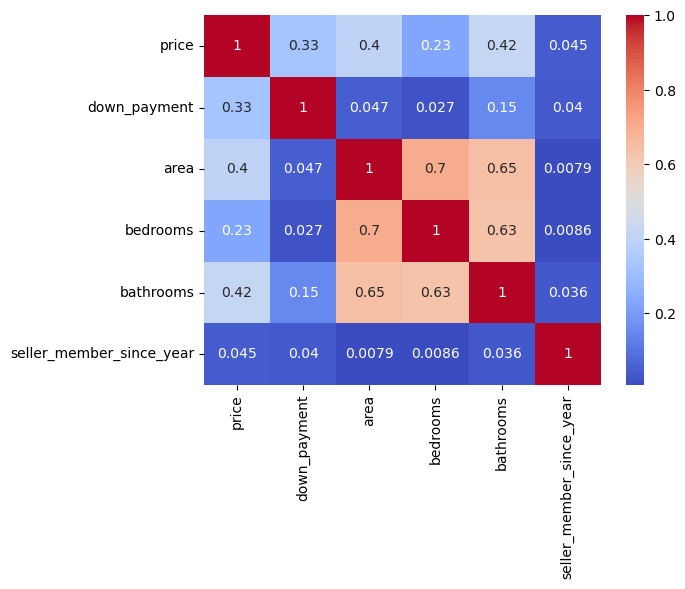

In [36]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

#  Save the final processed data in a database (MongoDB)

In [39]:
# pip install pymongo
#net start MongoDB
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')

db = client['dubizzle_db']

collection = db['properties']

records = dbzl.to_dict(orient='records')

collection.insert_many(records)

print("Data has been successfully stored in MongoDB")

Data has been successfully stored in MongoDB


In [40]:
sample_records = collection.find().limit(5)
for record in sample_records:
    print(record)

{'_id': ObjectId('681408d331c826511dc0069f'), 'link': 'https://www.dubizzle.com.eg/en/ad/ready-to-live-in-apartment-for-sale-at-mountain-view-icity-october-with-only-36k-quarterly-installments-ID501924822.html', 'title': 'Ready to live in - apartment for sale at Mountain View iCity October with only 36k quarterly installments !!', 'price': 5328000, 'down_payment': 4680000.0, 'location': 'Mountain View iCity Compound, 6th of October', 'creation_date': datetime.datetime(2025, 5, 1, 0, 0), 'property_type': 'Apartment', 'ownership': 'Resale', 'area': 114.0, 'bedrooms': 2.0, 'bathrooms': 2, 'furnished': 'No', 'payment_option': 'Installment', 'completion_status': 'Ready', 'amenities': 'Balcony, Security, Pets Allowed, Electricity Meter, Water Meter, Natural Gas, Landline', 'ad_id': '501924822', 'seller_type': 'Listed by agency', 'seller_name': 'Square Feet', 'seller_member_since': 'Member since Jan 2025', 'area_name': 'Mountain View iCity Compound', 'city': '6th of October', 'seller_member_s

# Analysis and Visualization

## Price Distribution (Histogram and Boxplot)

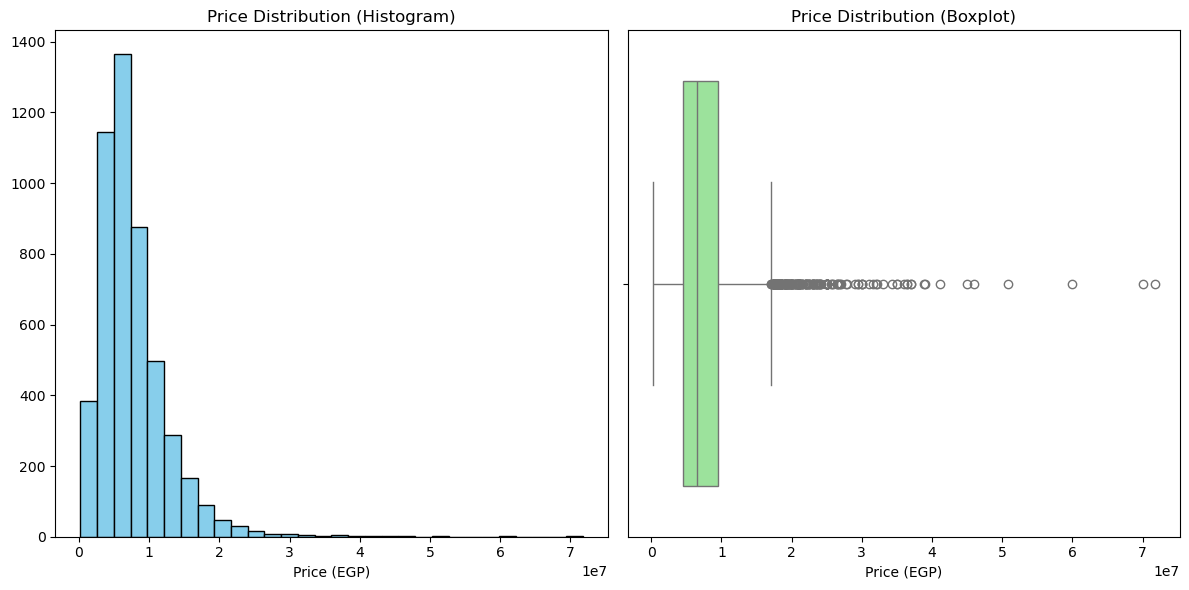

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  

plt.hist(dbzl['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price (EGP)')

plt.subplot(1, 2, 2)  
sns.boxplot(x=dbzl['price'], color='lightgreen')
plt.title('Price Distribution (Boxplot)')
plt.xlabel('Price (EGP)')

plt.tight_layout()
plt.show()

## Scatter plot showing the relationship between property prices and down payments.

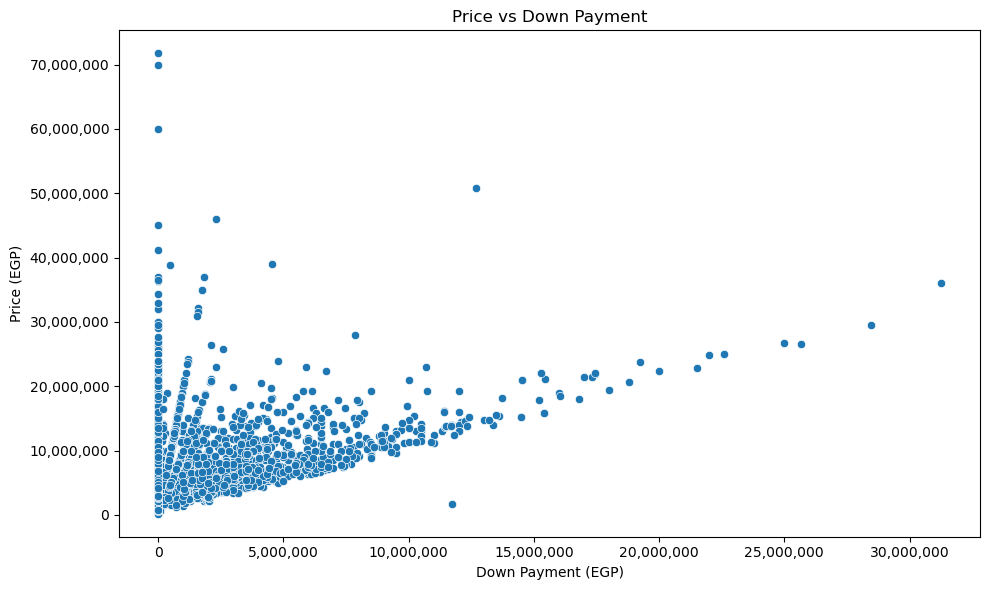

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dbzl, x='down_payment', y='price')
plt.title('Price vs Down Payment')
plt.xlabel('Down Payment (EGP)')
plt.ylabel('Price (EGP)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

## This bar chart compares the average down payment required for different property types

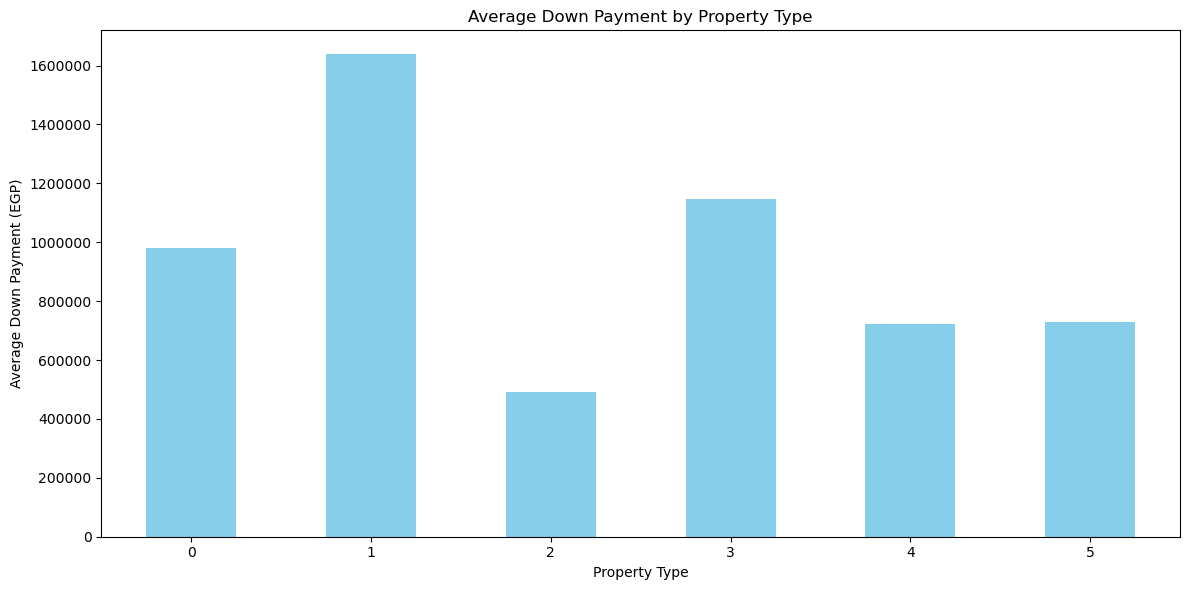

In [43]:
avg_down_payment = dbzl.groupby('property_type')['down_payment'].mean()
plt.figure(figsize=(12,6))
avg_down_payment.plot(kind='bar', color='skyblue')
plt.title('Average Down Payment by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Down Payment (EGP)')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Two side-by-side bar plots highlighting the areas with the highest and lowest average property prices.

In [46]:
avg_price_per_area = dbzl.groupby('location')['price'].mean().sort_values(ascending=False)

top_expensive = avg_price_per_area.head(10)
print("Top 10 Most Expensive Areas:")
print(top_expensive)

top_cheap = avg_price_per_area.tail(10)
print("\nTop 10 Cheapest Areas:")
print(top_cheap)

Top 10 Most Expensive Areas:
location
Marassi, North Coast                            6.587500e+07
R5, New Capital City                            3.900000e+07
Swan Lake West, Sheikh Zayed                    3.160000e+07
Silver Sands, North Coast                       3.033750e+07
Solana east, 5th Settlement                     2.577100e+07
Kattameya Residence Compound, 1st Settlement    2.500000e+07
Alamein Towers, North Coast                     2.302487e+07
Cairo Festival City, 5th Settlement             2.150000e+07
Hacienda Bay, North Coast                       2.147500e+07
Allegria Residence, Sheikh Zayed                2.109542e+07
Name: price, dtype: float64

Top 10 Cheapest Areas:
location
Nakheel, Alexandria    804166.666667
Bacchus, Alexandria    800000.000000
Ain Shams, Cairo       760000.000000
Agami, Alexandria      756666.666667
Ard El Lewa, Giza      750000.000000
Nagela, Matruh         700000.000000
Kilo 21, Agami         695000.000000
Dahshur, Giza          650000.00

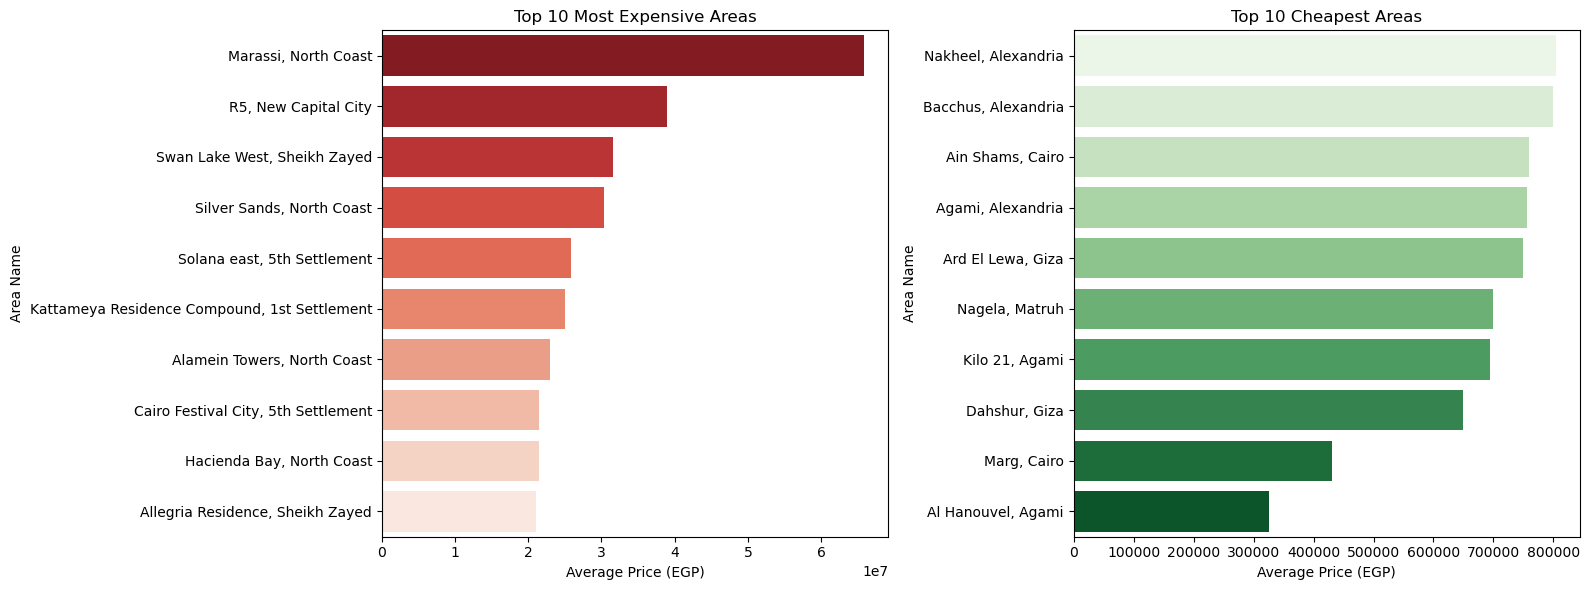

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x=top_expensive.values, y=top_expensive.index, hue=top_expensive.index,
            ax=axes[0], palette="Reds_r", legend=False)
axes[0].set_title('Top 10 Most Expensive Areas')
axes[0].set_xlabel('Average Price (EGP)')
axes[0].set_ylabel('Area Name')

sns.barplot(x=top_cheap.values, y=top_cheap.index, hue=top_cheap.index,
            ax=axes[1], palette="Greens", legend=False)
axes[1].set_title('Top 10 Cheapest Areas')
axes[1].set_xlabel('Average Price (EGP)')
axes[1].set_ylabel('Area Name')

plt.tight_layout()
plt.show()

## Bar chart showing the areas with the most property listings, helping to identify high-demand regions.


area_name
Madinaty                         322
Mountain View iCity Compound     186
Hurghada                         180
Taj City Compound                133
Hyde Park New Cairo Compound     132
5th Settlement                   120
Sarai                            118
Rehab City Compound              109
Fifth Square Compound            103
Palm Hills New Cairo Compound     76
Name: count, dtype: int64


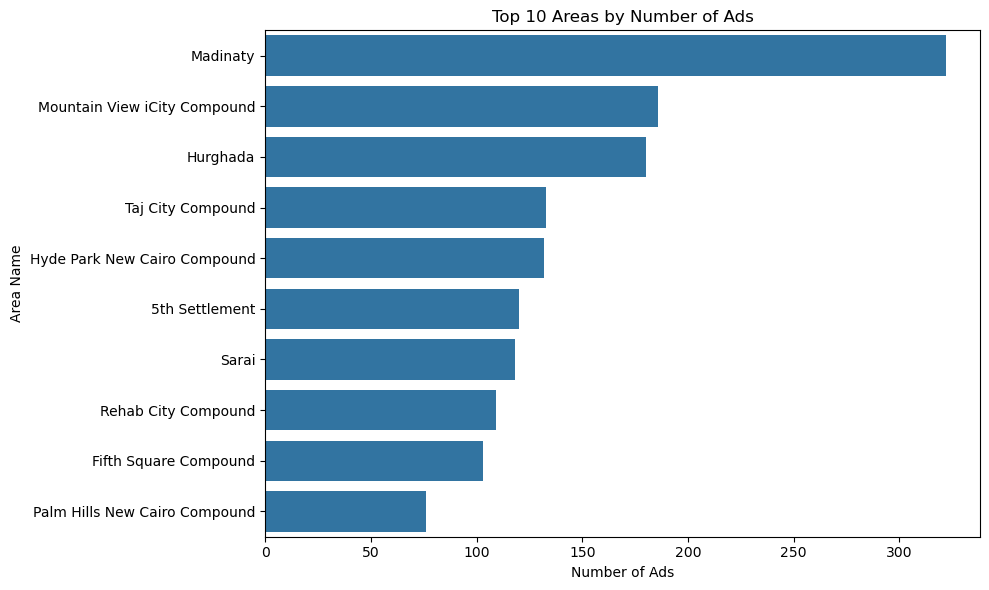

In [48]:
top_areas_by_Number_of_Ads = dbzl['area_name'].value_counts().head(10)
print(top_areas_by_Number_of_Ads)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_areas_by_Number_of_Ads.values, y=top_areas_by_Number_of_Ads.index)
plt.title("Top 10 Areas by Number of Ads")
plt.xlabel("Number of Ads")
plt.ylabel("Area Name")
plt.tight_layout()
plt.show()

## A boxplot to analyze how the number of amenities influences property prices, offering a better understanding of how amenities affect pricing.


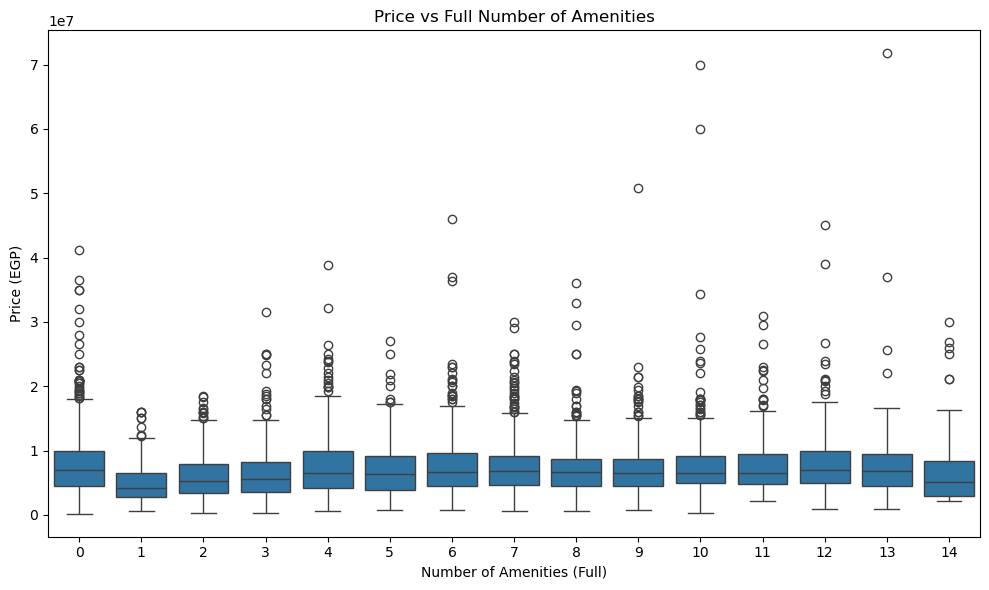

In [49]:
dbzl['amenities_count_full'] = dbzl['amenities'].fillna('').apply(lambda x: len([a.strip() for a in x.split(',') if a.strip() != '' and a.strip().lower() != 'unknown']))

plt.figure(figsize=(10, 6))
sns.boxplot(data=dbzl, x='amenities_count_full', y='price')
plt.title('Price vs Full Number of Amenities')
plt.xlabel('Number of Amenities (Full)')
plt.ylabel('Price (EGP)')
plt.tight_layout()
plt.show()

##  Line plot showing the number of listings posted each day.

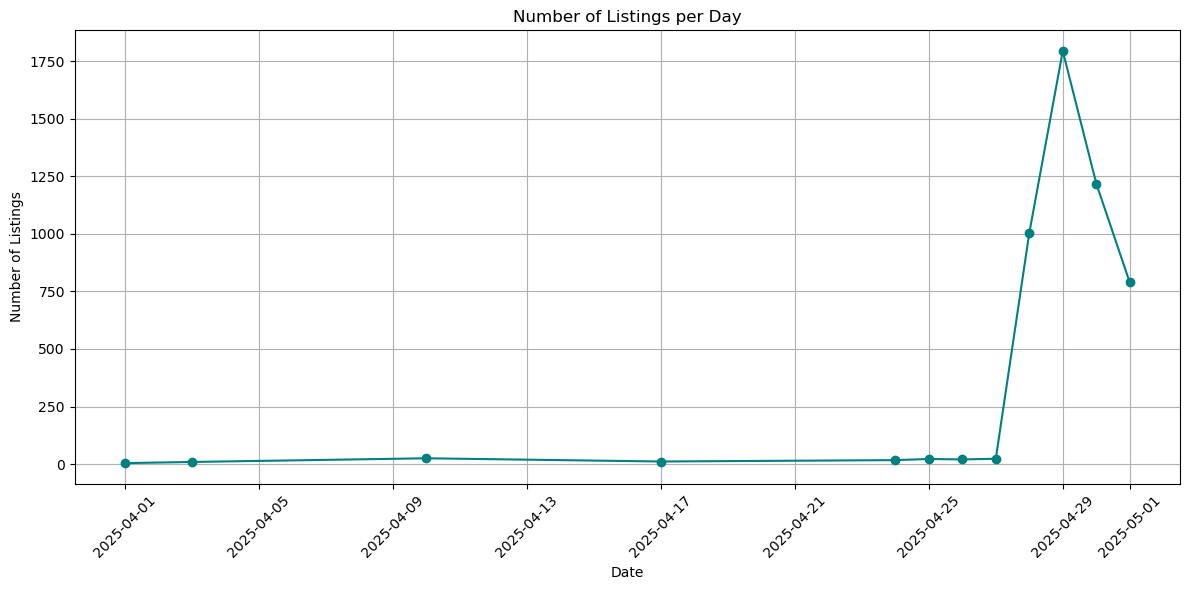

In [50]:
daily_counts = dbzl['creation_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='teal')
plt.title("Number of Listings per Day")
plt.xlabel("Date")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## This boxplot helps to visualize the variation in property prices across different types of properties.

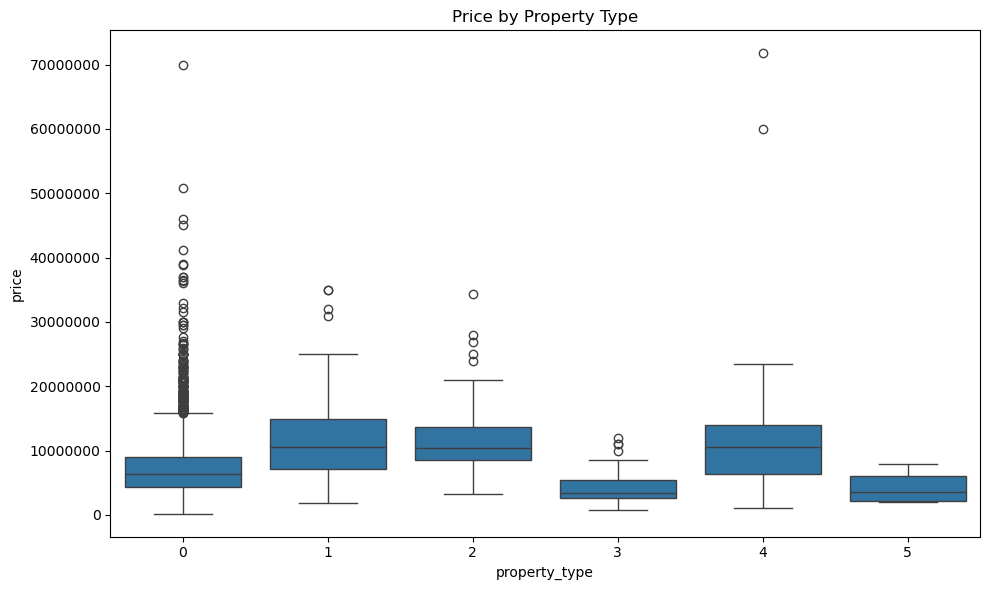

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dbzl, x='property_type', y='price')
plt.xticks(rotation=0)
plt.title('Price by Property Type')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y') 
plt.tight_layout()
plt.show()

In [52]:
most_common_type = dbzl.groupby('area_name')['property_type'].agg(lambda x: x.value_counts().idxmax())
print(most_common_type)

area_name
10th District               Apartment
10th of Ramadan             Apartment
11th District               Apartment
12th District               Apartment
13th District               Apartment
                              ...    
Zed East Compound           Apartment
Zed Towers                  Apartment
Zezenia                     Apartment
Zizinia Gardens Compound       Duplex
Zizinia Rose Compound          Duplex
Name: property_type, Length: 533, dtype: object


## This boxplot compares property prices based on the number of bedrooms, which is often an essential factor for buyers.

C:\Users\Saeed\AppData\Local\Temp\ipykernel_2460\3571217255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dbzl, x='bedrooms', y='price', palette="coolwarm")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


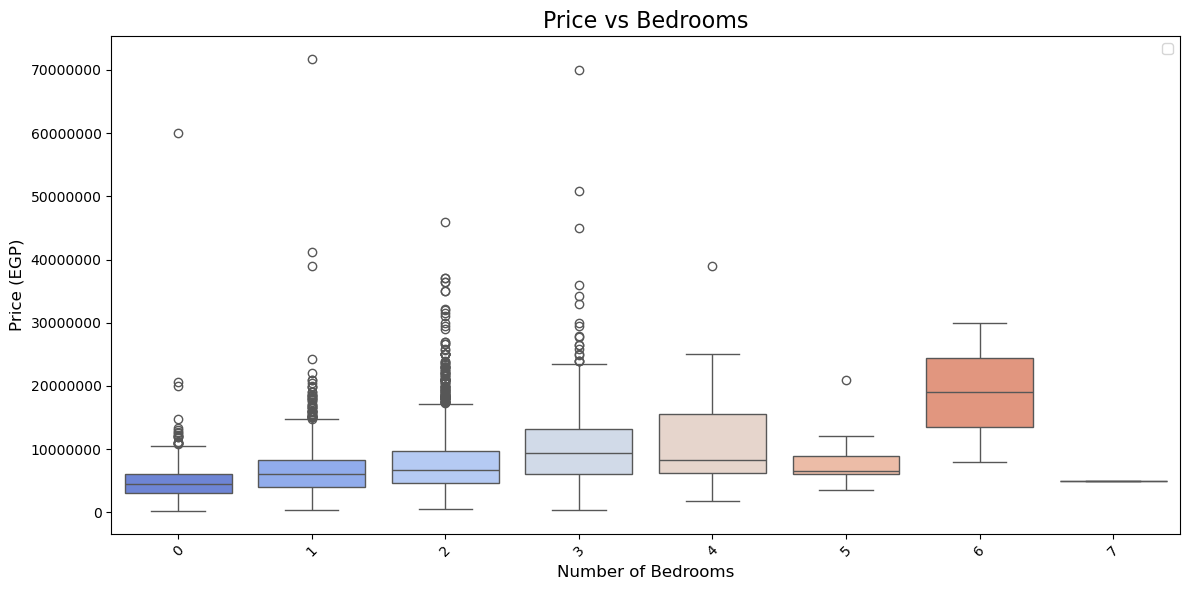

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dbzl, x='bedrooms', y='price', palette="coolwarm")
plt.title("Price vs Bedrooms", fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price (EGP)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

## Heatmap showing the distribution of bedrooms and bathrooms across different property types. Useful for understanding the variety of properties available in the dataset.

In [54]:
room_type_relation = dbzl.groupby(['bedrooms', 'property_type']).size().unstack(fill_value=0)
print(room_type_relation)

property_type  Apartment  Duplex  Hotel Apartment  Penthouse  Roof  Studio
bedrooms                                                                  
1.0                  174       2                7          3     3      78
2.0                 1277      17                9         29     3       0
3.0                 2655     134                3         73     4       0
4.0                  287      74                3         42     0       0
5.0                   22      19                4          2     0       0
6.0                    4       4                1          0     1       0
7.0                    1       1                0          0     0       0
8.0                    1       0                0          0     0       0


In [55]:
bathroom_type_relation = dbzl.groupby(['bathrooms', 'property_type']).size().unstack(fill_value=0)
print(bathroom_type_relation)


property_type  Apartment  Duplex  Hotel Apartment  Penthouse  Roof  Studio
bathrooms                                                                 
1                    714       2                4          3     5      72
2                   1897      29               10         38     3       6
3                   1655     143                8         75     3       0
4                    140      70                0         31     0       0
5                     10       6                3          2     0       0
6                      5       1                2          0     0       0
8                      1       0                0          0     0       0


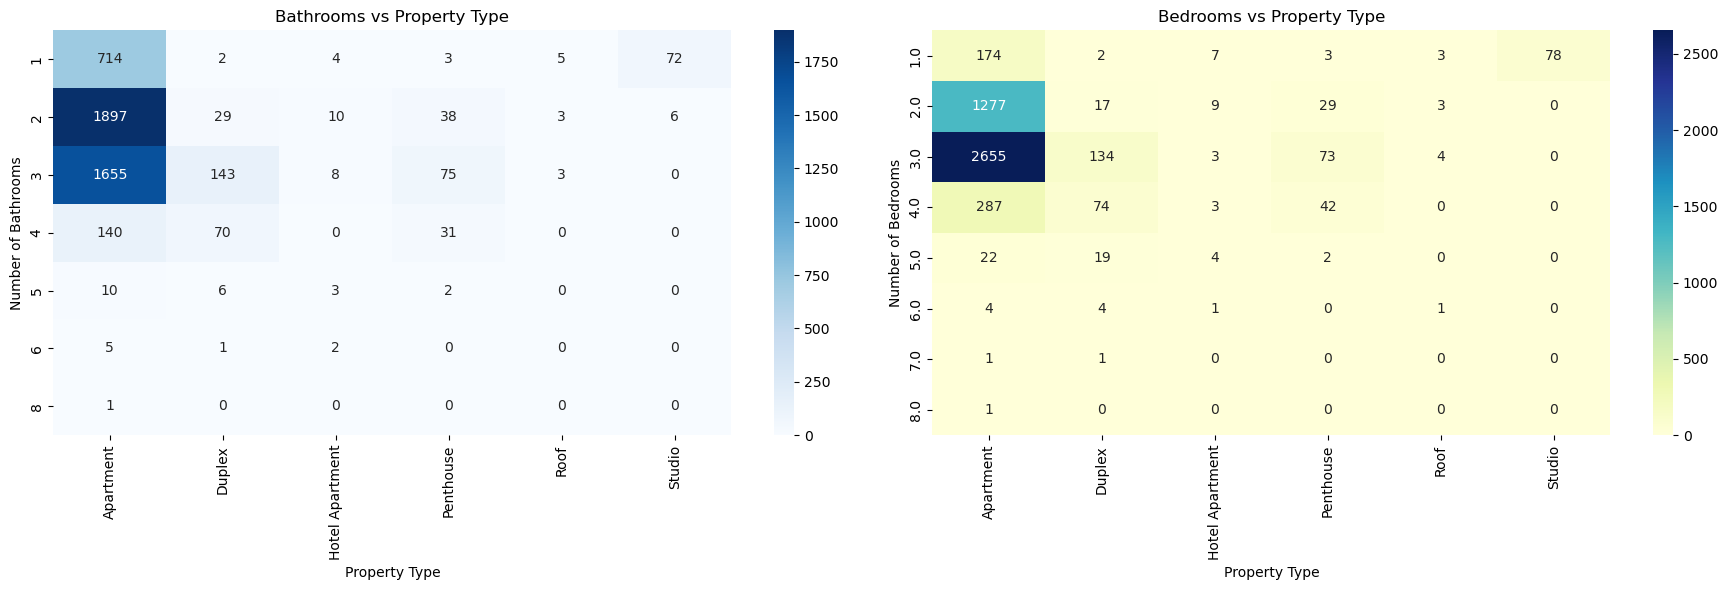

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.heatmap(bathroom_type_relation, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Bathrooms vs Property Type')
axes[0].set_xlabel('Property Type')
axes[0].set_ylabel('Number of Bathrooms')

sns.heatmap(room_type_relation, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Bedrooms vs Property Type')
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Number of Bedrooms')

plt.tight_layout()
plt.show()

In [57]:
dbzl['has_garden'] = dbzl['amenities'].str.contains('Garden', na=False)
dbzl['has_security'] = dbzl['amenities'].str.contains('Security', na=False)
dbzl['has_pool'] = dbzl['amenities'].str.contains('Pool', na=False)
dbzl['has_balcony'] = dbzl['amenities'].str.contains('Balcony', na=False)
dbzl['has_parking'] = dbzl['amenities'].str.contains('Covered Parking', na=False)
dbzl['has_elevator'] = dbzl['amenities'].str.contains('Elevator', na=False)
for property_type in dbzl['property_type'].unique():
    subset = dbzl[dbzl['property_type'] == property_type]
    amenities_impact = subset.groupby(['has_garden', 'has_security', 'has_pool', 'has_balcony', 'has_parking', 'has_elevator'])['price'].mean().reset_index()
    # print(f"Amenities Impact for {property_type}:")
    # print(amenities_impact)

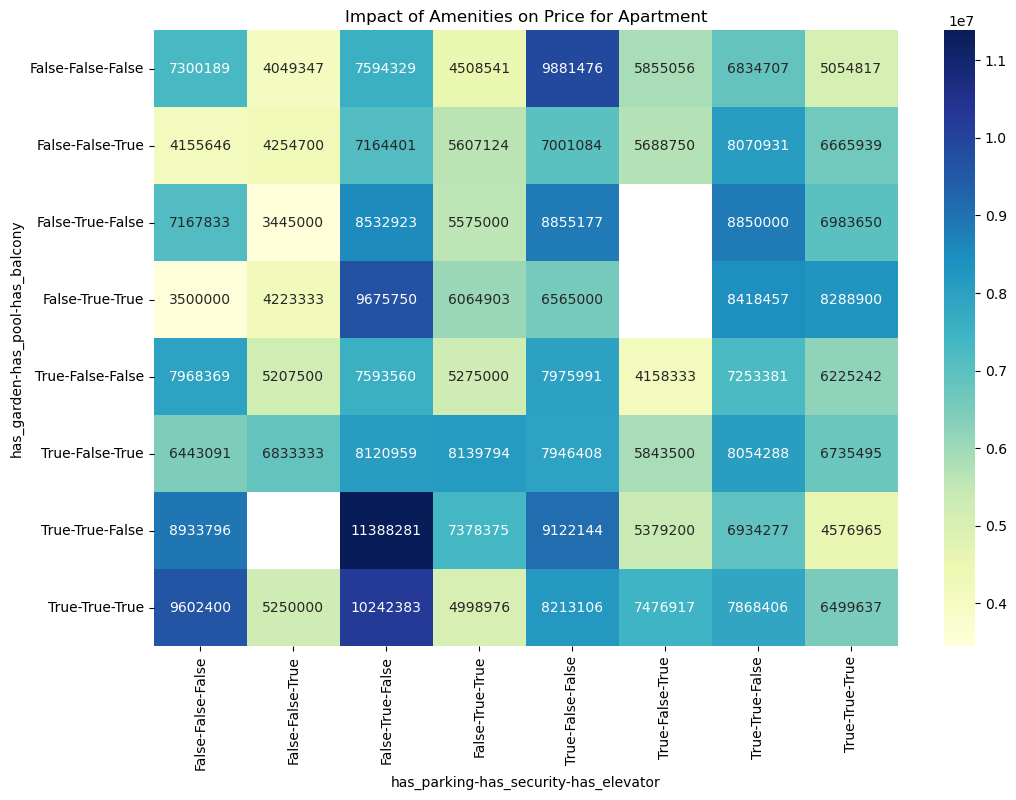

In [58]:
property_type = 'Apartment'
subset = dbzl[dbzl['property_type'] == property_type]
amenities_impact = subset.groupby(['has_garden', 'has_security', 'has_pool', 
                                   'has_balcony', 'has_parking', 'has_elevator'])['price'].mean().reset_index()

pivot = amenities_impact.pivot_table(values='price', 
                                     index=['has_garden', 'has_pool', 'has_balcony'], 
                                     columns=['has_parking', 'has_security', 'has_elevator'], 
                                     aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title(f"Impact of Amenities on Price for {property_type}")
plt.show()


## Impact of amenities on price.


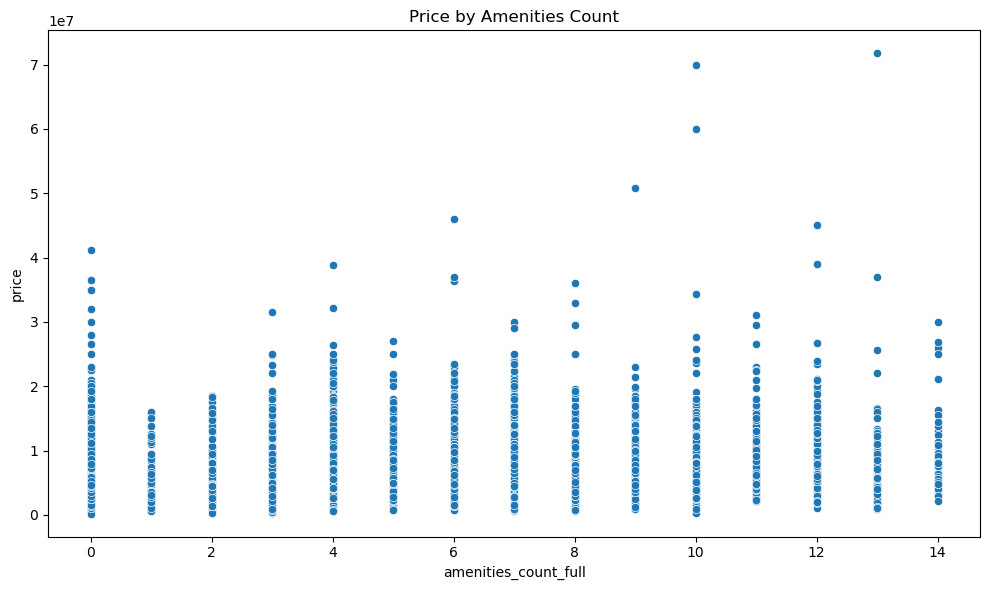

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dbzl, x='amenities_count_full', y='price')
plt.title("Price by Amenities Count")
plt.tight_layout()
plt.show()


## Analyzes the importance of features for price prediction.


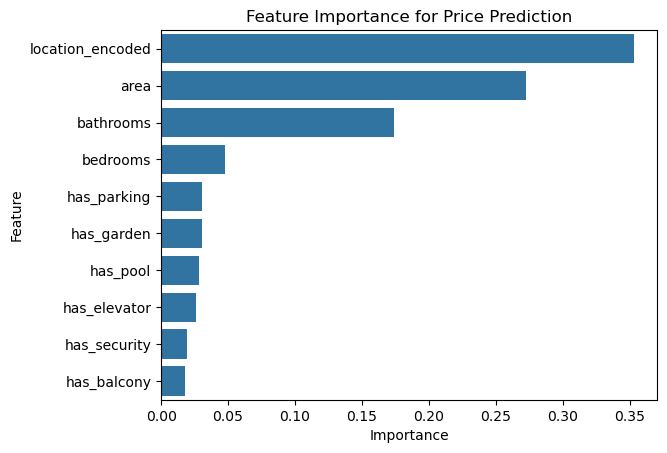

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
le = LabelEncoder()
dbzl['location_encoded'] = le.fit_transform(dbzl['location'])
features = ['has_garden', 'has_security', 'has_pool', 'has_balcony', 'has_parking', 'has_elevator', 'area', 'bedrooms', 'bathrooms', 'location_encoded']
X = dbzl[features].dropna()
y = dbzl.loc[X.index, 'price']
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Price Prediction')
plt.show()

## Compares bedrooms and area by property type.


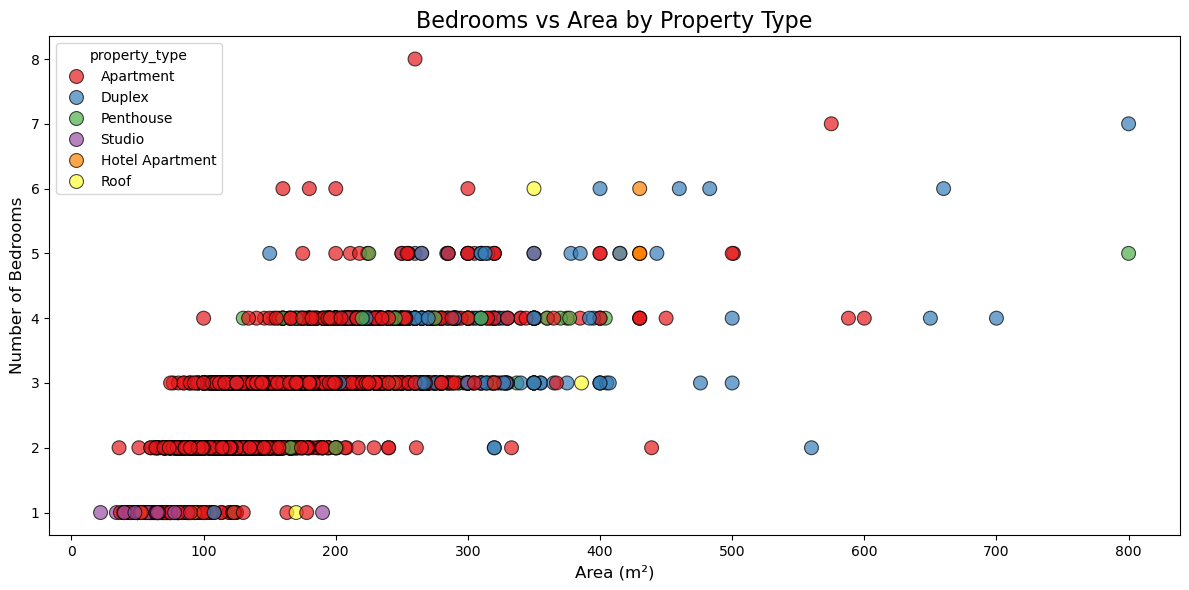

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dbzl, x='area', y='bedrooms', hue='property_type', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title("Bedrooms vs Area by Property Type", fontsize=16)
plt.xlabel("Area (m²)", fontsize=12)
plt.ylabel("Number of Bedrooms", fontsize=12)
plt.tight_layout()
plt.show()


## Compares price based on ownership type.


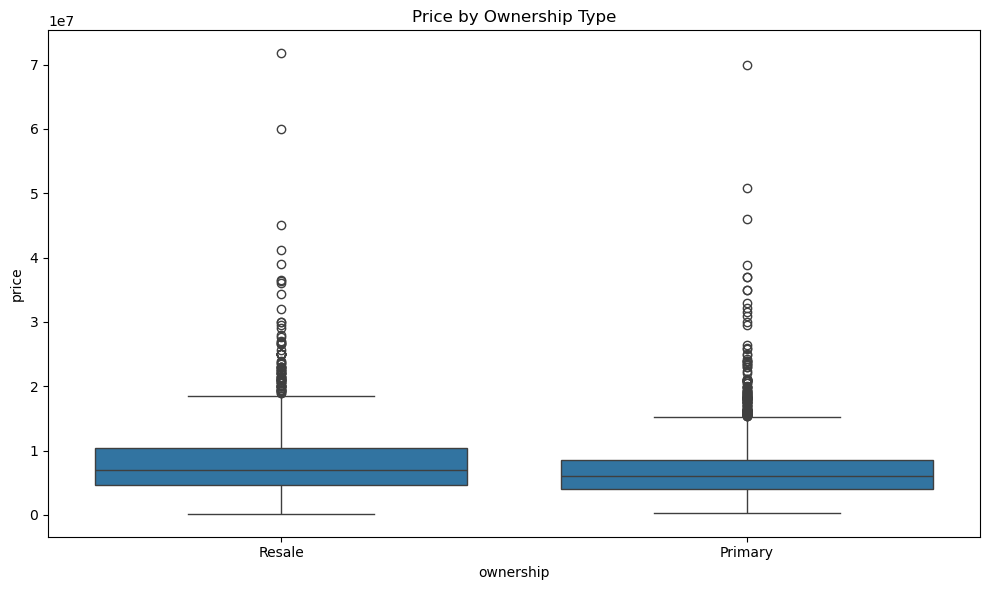

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dbzl, x='ownership', y='price')
plt.title("Price by Ownership Type")
plt.tight_layout()
plt.show()


## Distribution of ownership types.


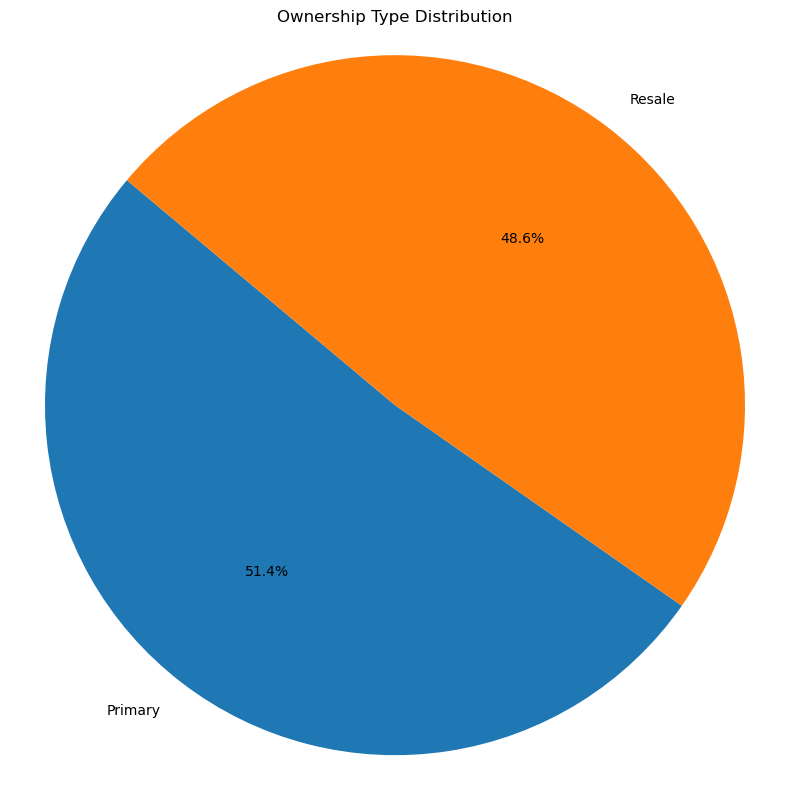

In [63]:
plt.figure(figsize=(8, 8))
ownership_counts = dbzl['ownership'].value_counts()
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ownership Type Distribution')
plt.axis('equal') 
plt.tight_layout()
plt.show()

## Distribution of property types.


C:\Users\Saeed\AppData\Local\Temp\ipykernel_2460\3646685647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=property_counts.values, y=property_counts.index, palette='viridis')


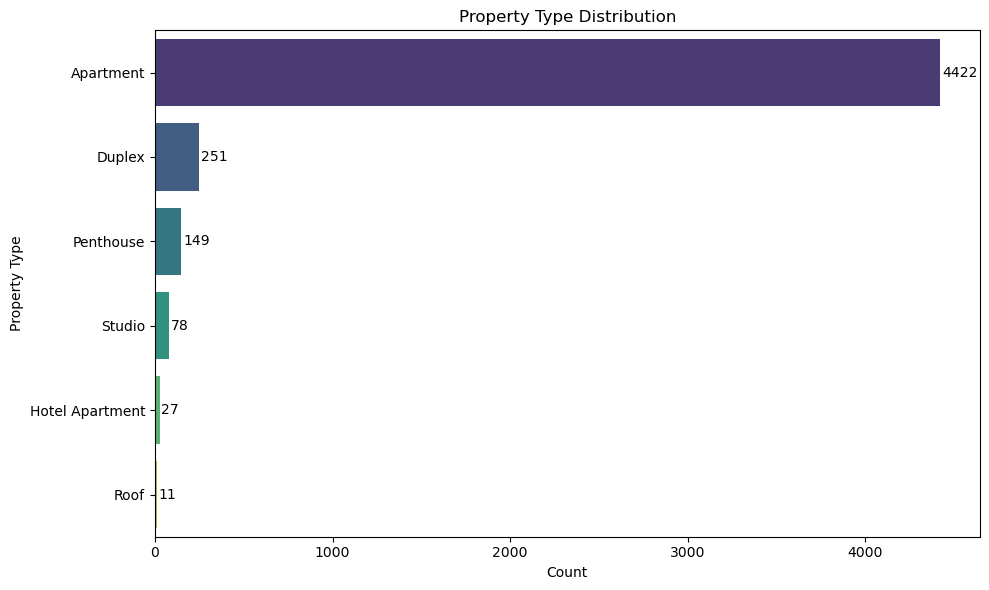

In [64]:
plt.figure(figsize=(10, 6))
property_counts = dbzl['property_type'].value_counts()

ax = sns.barplot(x=property_counts.values, y=property_counts.index, palette='viridis')
plt.title("Property Type Distribution")
plt.xlabel("Count")
plt.ylabel("Property Type")

for i, v in enumerate(property_counts.values):
    ax.text(v + 10, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


## Compares price by payment option.


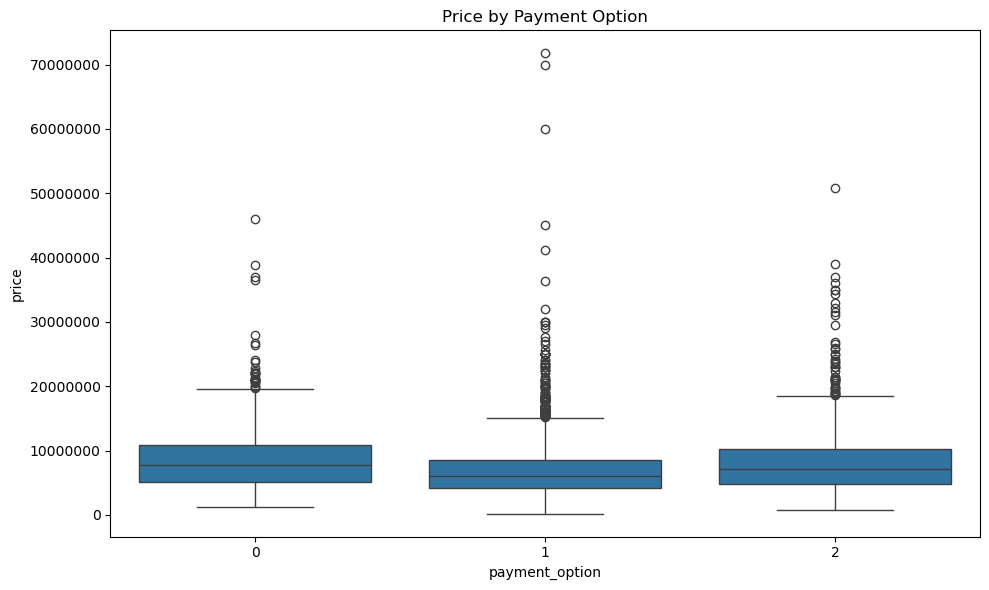

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dbzl, x='payment_option', y='price')
plt.title("Price by Payment Option")

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y') 

plt.tight_layout()
plt.show()


## Relationship between price and area based on payment option.


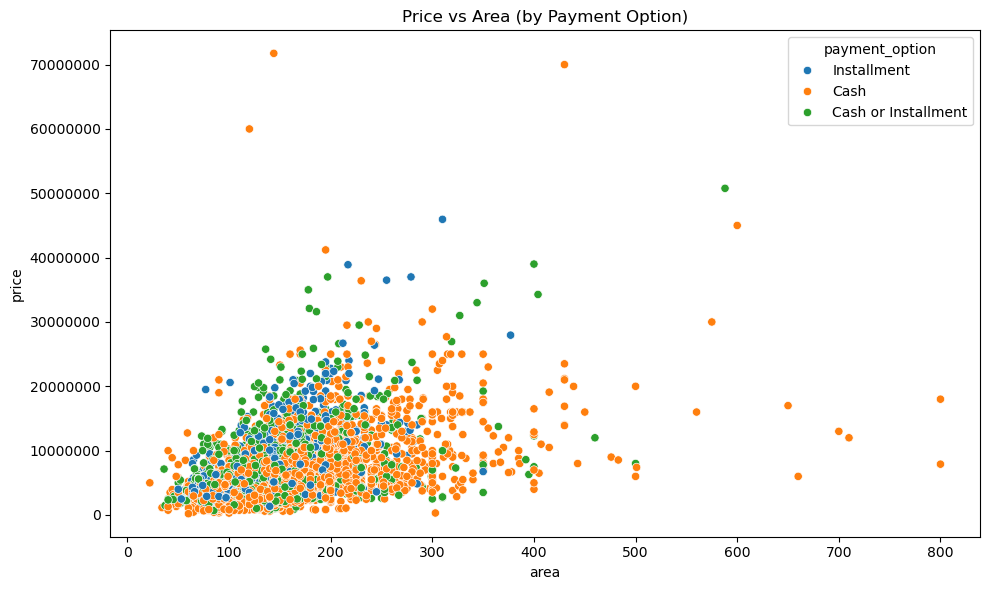

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dbzl, x='area', y='price', hue='payment_option')
plt.title("Price vs Area (by Payment Option)")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.ticklabel_format(style='plain', axis='y') 
plt.tight_layout()
plt.show()

## Distribution of furnished vs unfurnished properties.


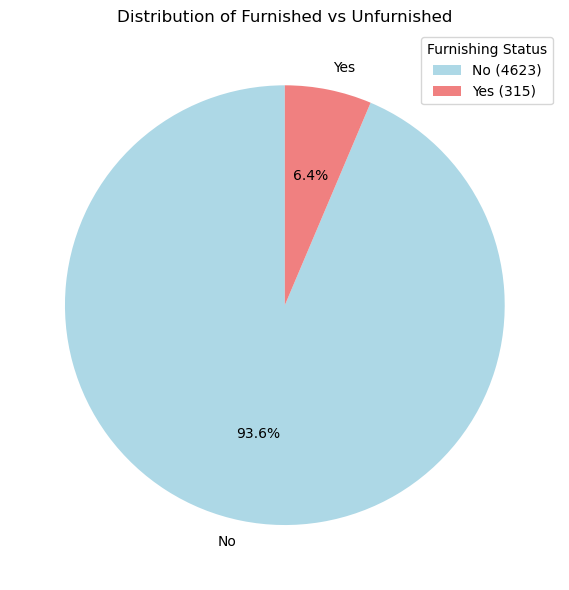

In [67]:
furnished_counts = dbzl['furnished'].value_counts()

plt.figure(figsize=(8,6))
furnished_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Furnished vs Unfurnished")
plt.ylabel('')  
plt.legend(title="Furnishing Status",
        labels=[f'{label} ({count})' 
                for label, count in zip(furnished_counts.index, furnished_counts)],
        loc='best')
plt.tight_layout()
plt.show()

## Completion status by property type.


In [68]:
completion_status_property_type = pd.crosstab(dbzl['property_type'], dbzl['completion_status'])
fig = go.Figure()
for status in completion_status_property_type.columns:
    fig.add_trace(
        go.Bar(
            y=completion_status_property_type.index,  
            x=completion_status_property_type[status], 
            name=status, 
            orientation='h'  
        )
    )

fig.update_layout(
    title='Completion Status by Property Type',
    xaxis_title='Count',
    yaxis_title='Property Type',
    barmode='stack',  # جعل الأعمدة مكدسة
    legend_title='Completion Status',
    template='plotly',  # استخدام قالب plotly الافتراضي
    height=600,
    width=1200
)
fig.show()

## Compares price by completion status.


C:\Users\Saeed\AppData\Local\Temp\ipykernel_2460\1084899240.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




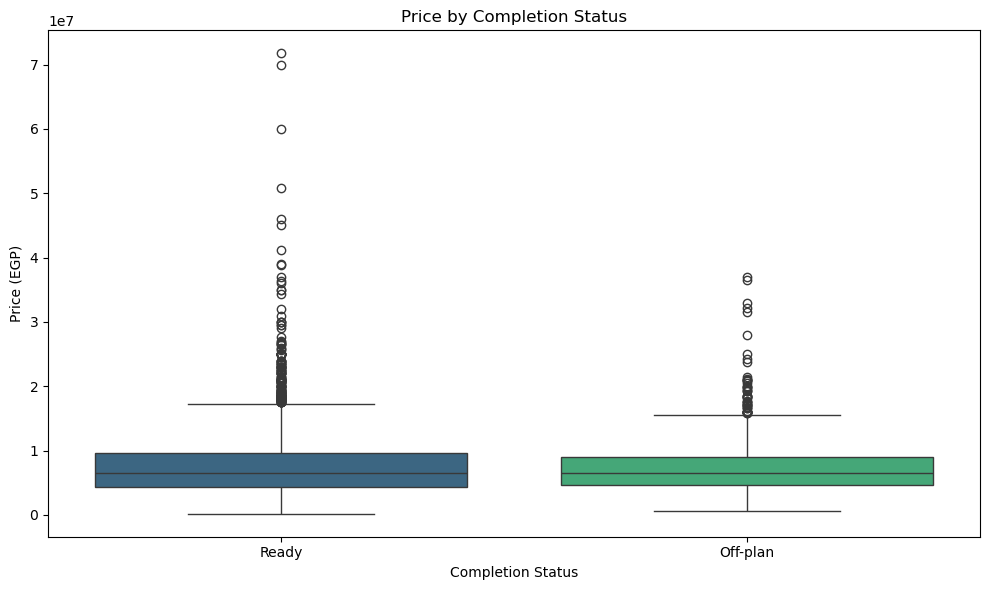

In [69]:
# Boxplot to show the relationship between completion status and price
plt.figure(figsize=(10,6))
sns.boxplot(data=dbzl, x='completion_status', y='price', palette='viridis')
plt.title("Price by Completion Status")
plt.xlabel('Completion Status')
plt.ylabel('Price (EGP)')
plt.tight_layout()
plt.show()


## Distribution of completion statuses.

C:\Users\Saeed\AppData\Local\Temp\ipykernel_2460\589165065.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




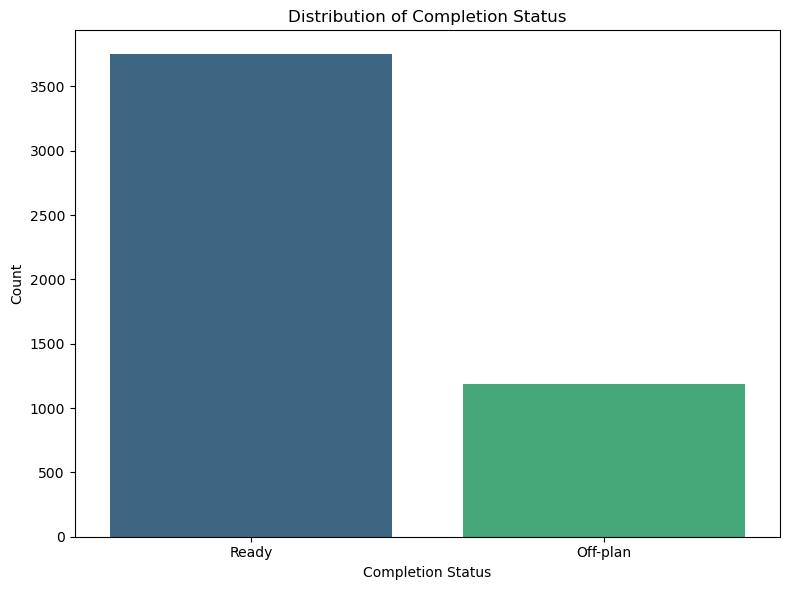

In [70]:
completion_status_counts = dbzl['completion_status'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=completion_status_counts.index, y=completion_status_counts.values, palette='viridis')
plt.title('Distribution of Completion Status')
plt.xlabel('Completion Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Word cloud of seller names.

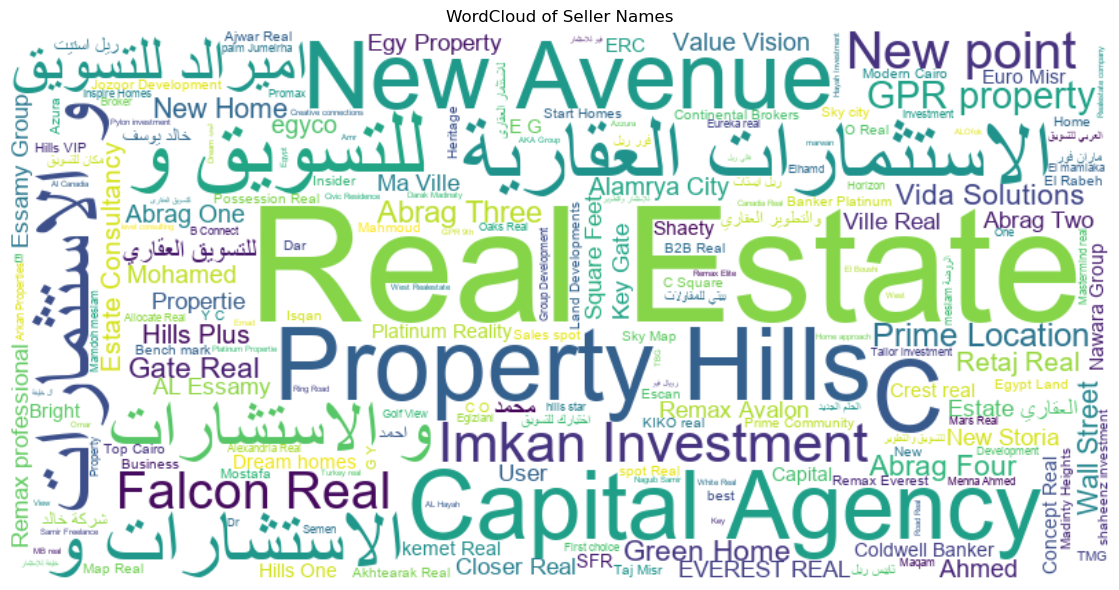

In [ ]:
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# Process Arabic text
text = " ".join(dbzl['seller_name'].dropna().astype(str))
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', font_path="arial.ttf").generate(bidi_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Seller Names")
plt.tight_layout()
plt.show()

In [73]:
# dbzl.to_csv("Dubizzle_properties_cleaned.csv")